In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'PACKAGE IN LPA')

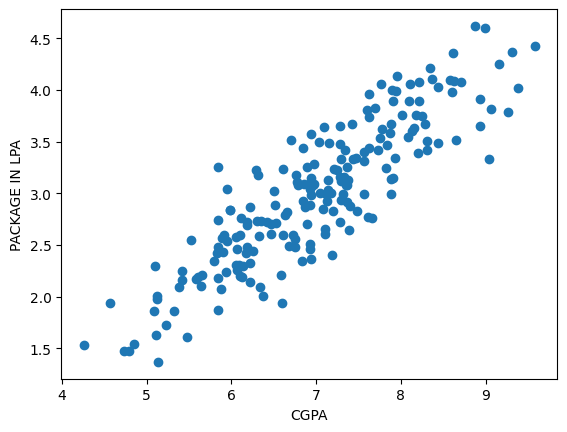

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE IN LPA')

In [6]:
X=df.drop('package',axis=1)
y=df['package']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,cgpa
79,7.18
197,7.21
38,8.62
24,6.53
122,5.12


In [8]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

Text(0, 0.5, 'PACKAGE IN LPA')

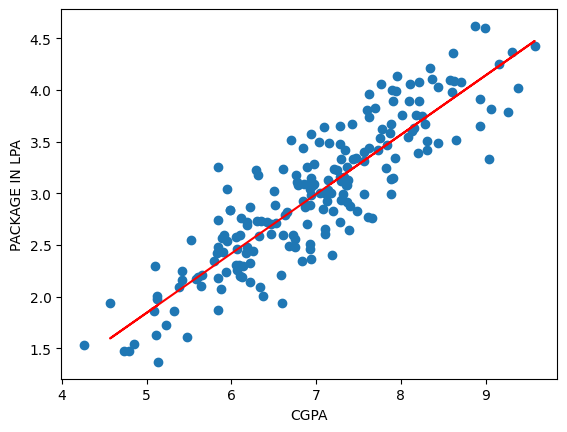

In [9]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE IN LPA')

In [11]:
y_pred=lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [19]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R2 score:",r2)
adjusted_r2=1 - ((1-r2)*(40-1)/(40-1-1))
print("Adjusted R2:",adjusted_r2)

MAE: 0.23150985393278373
MSE: 0.08417638361329656
RMSE: 0.2901316659954521
R2 score: 0.7730984312051673
Adjusted R2: 0.7671273372895138


In [20]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.334680,3.26
1,5.12,0.258858,1.98
2,7.82,0.406984,3.25
3,7.42,0.550060,3.67
4,6.94,0.251009,3.57


In [23]:
X=new_df1.drop('package',axis=1)
y=new_df1['package']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,cgpa,random_feature
79,7.18,0.684344
197,7.21,0.521206
38,8.62,0.783250
24,6.53,0.834531
122,5.12,0.657792


In [26]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)


LinearRegression()

In [27]:
y_pred1 = lr1.predict(X_test)

In [28]:
print("MAE:",mean_absolute_error(y_test,y_pred1))
print("MSE:",mean_squared_error(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
r2 = r2_score(y_test,y_pred1)
print("R2 score:",r2)
adjusted_r2=1 - ((1-r2)*(40-1)/(40-1-1))
print("Adjusted R2:",adjusted_r2)

MAE: 0.25008454653608975
MSE: 0.08852530958808631
RMSE: 0.2975320311967878
R2 score: 0.7613756880330964
Adjusted R2: 0.7550961008760726


In [29]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
48,8.63,2.89,4.09
40,9.38,3.32,4.02
126,5.91,3.00,2.60
108,7.76,4.54,3.54
151,6.12,3.26,2.76


In [31]:
X=new_df2.drop('package',axis=1)
y=new_df2['package']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,cgpa,iq
79,7.18,2.80
197,7.21,2.84
38,8.62,3.46
24,6.53,2.11
122,5.12,2.91


In [32]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
y_pred2 = lr2.predict(X_test)

Text(0, 0.5, 'Package(in lpa)')

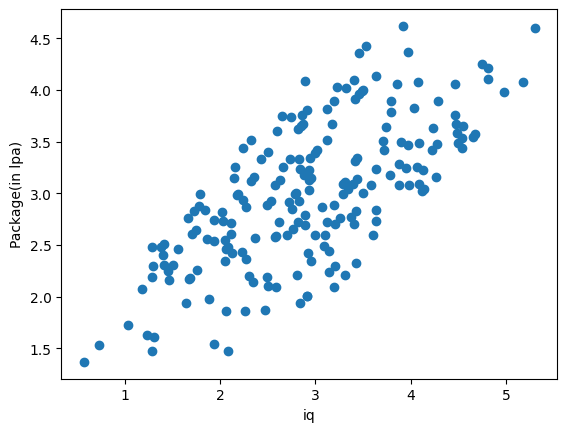

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [34]:
print("MAE:",mean_absolute_error(y_test,y_pred2))
print("MSE:",mean_squared_error(y_test,y_pred2))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred2)))
r2 = r2_score(y_test,y_pred2)
print("R2 score:",r2)
adjusted_r2=1 - ((1-r2)*(40-1)/(40-1-1))
print("Adjusted R2:",adjusted_r2)

MAE: 0.215106335763226
MSE: 0.07248942186645159
RMSE: 0.2692385965392993
R2 score: 0.8046012095495847
Adjusted R2: 0.7994591361166791
